In [1]:
import numpy as np 
import matplotlib as mp
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.contrib.slim as slim
from tensorflow.examples.tutorials.mnist import input_data
import math

1.加载 MNIST 数据集用来演示。

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
label = [641,737,1309,2123]
for i in label:
    print(mnist.train.labels[i])

[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


2.定义卷积层

In [4]:
tf.reset_default_graph()
batchSize = 128
learning_rate = 0.001

x = tf.placeholder(tf.float32, [None, 784],name="x-in")
true_y = tf.placeholder(tf.float32, [None, 10],name="y-in")
keep_prob = tf.placeholder("float")

x_image = tf.reshape(x,[-1,28,28,1])

hidden_1 = slim.conv2d(x_image,32,[3,3])
pool_1 = slim.max_pool2d(hidden_1,[2,2])

hidden_2 = slim.conv2d(pool_1,64,[3,3])
pool_2 = slim.max_pool2d(hidden_2,[2,2])


out_y = slim.fully_connected(slim.flatten(hidden_2),10,activation_fn=tf.nn.softmax)

cross_entropy = -tf.reduce_sum(true_y*tf.log(out_y))
correct_prediction = tf.equal(tf.argmax(out_y,1), tf.argmax(true_y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)

3. 训练网络参数

In [5]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
for i in range(1001):
    batch = mnist.train.next_batch(batchSize)
    sess.run(train_step, feed_dict={x:batch[0],true_y:batch[1], keep_prob:0.5})
    if i % 100 == 0 and i != 0:
        trainAccuracy = sess.run(accuracy, feed_dict={x:batch[0],true_y:batch[1], keep_prob:1.0})
        print("step %d, training accuracy %g"%(i, trainAccuracy))

step 100, training accuracy 0.953125
step 200, training accuracy 0.976562
step 300, training accuracy 0.984375
step 400, training accuracy 1
step 500, training accuracy 0.976562
step 600, training accuracy 0.96875
step 700, training accuracy 0.976562
step 800, training accuracy 0.992188
step 900, training accuracy 0.992188
step 1000, training accuracy 0.992188


In [6]:
testAccuracy = sess.run(accuracy, feed_dict={x:mnist.test.images,true_y:mnist.test.labels, keep_prob:1.0})
print("test accuracy %g"%(testAccuracy))

test accuracy 0.9876


4.定义函数用来可视化网络。

In [7]:
def getActivations(layer,stimuli):
    units = sess.run(layer,feed_dict={x:np.reshape(stimuli,[1,784],order='F'),keep_prob:1.0})
    plotNNFilter(units)

In [8]:
def plotNNFilter(units):
    filters = units.shape[3]
    plt.figure(1, figsize=(20,20))
    n_columns = 8
    n_rows = math.ceil(filters / n_columns) + 1
    for i in range(filters):
        plt.subplot(n_rows, n_columns, i+1)
        plt.title('Filter ' + str(i))
        plt.imshow(units[0,:,:,i], interpolation="nearest", cmap="gray")

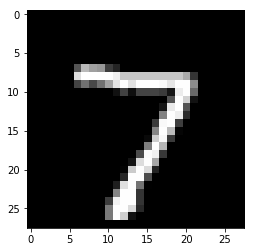

In [9]:
imageToUse = mnist.test.images[0]
plt.imshow(np.reshape(imageToUse,[28,28]), interpolation="nearest", cmap="gray")

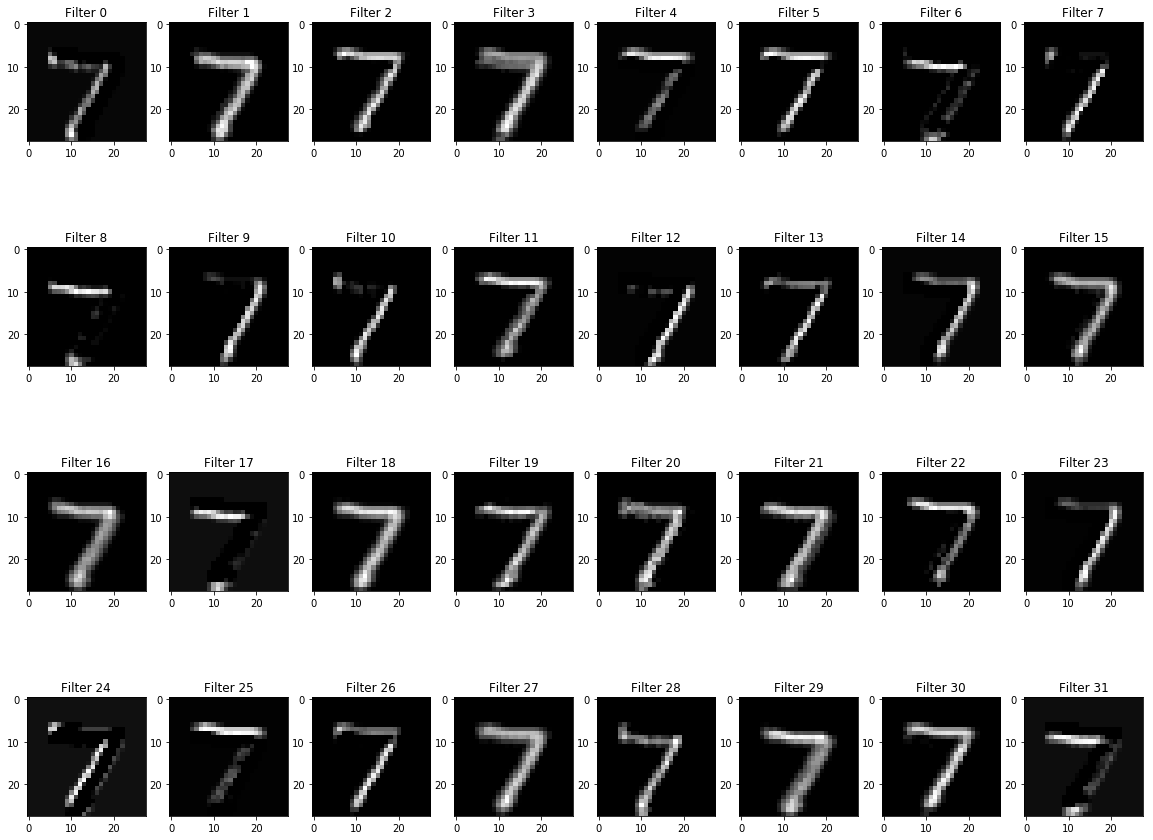

In [10]:
getActivations(hidden_1,imageToUse)

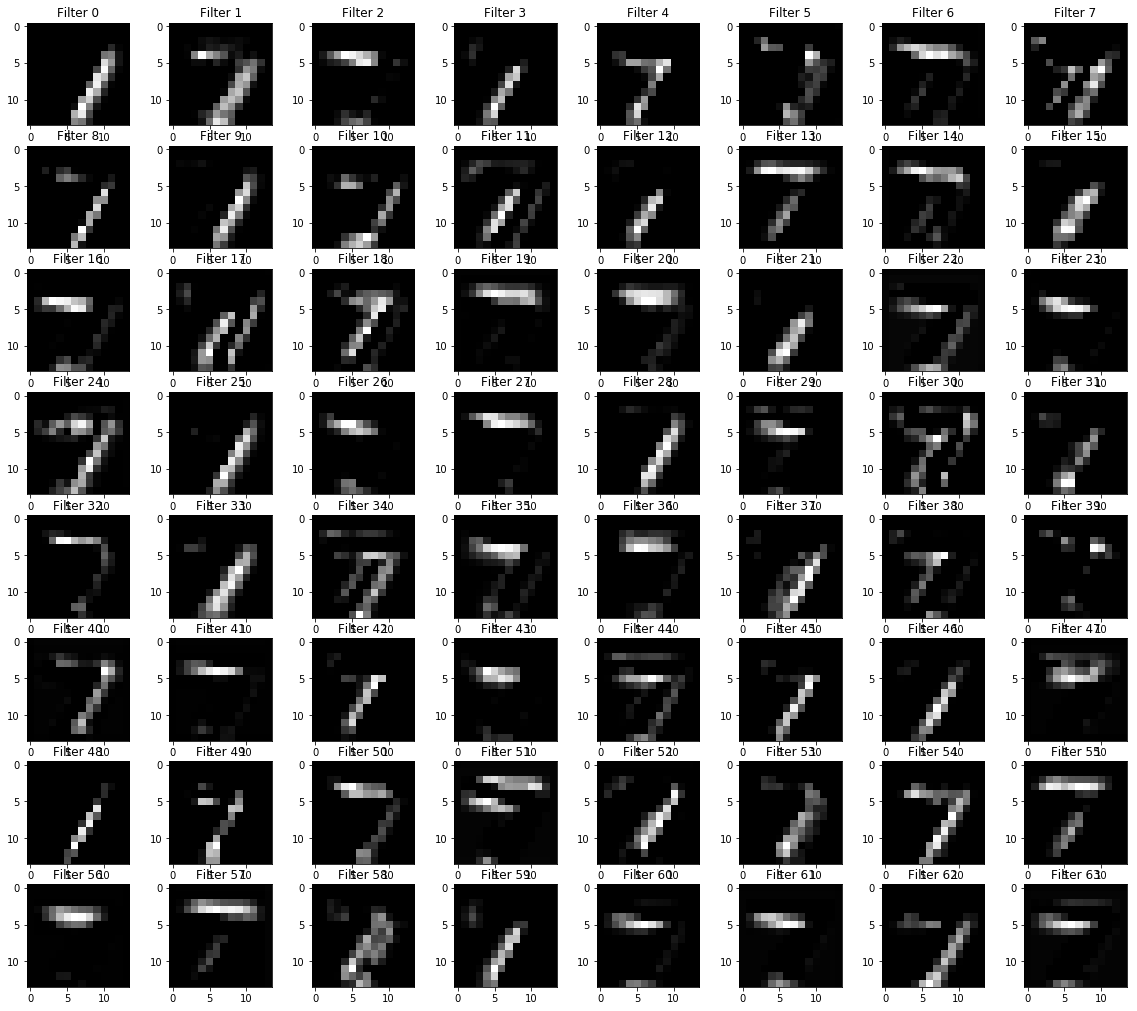

In [11]:
getActivations(hidden_2,imageToUse)

In [12]:
#getActivations(hidden_3,imageToUse)

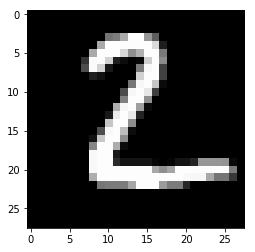

In [13]:
Use = mnist.test.images[1]
plt.imshow(np.reshape(Use,[28,28]), interpolation="nearest", cmap="gray")

In [14]:
r = 1
print("Prediction: ", sess.run(
    tf.argmax(out_y, 1), feed_dict={x: mnist.test.images[r:r + 1]}))

Prediction:  [2]


In [15]:
print("Probs: ", sess.run(
    out_y, feed_dict={x: mnist.test.images[r:r + 1]}))

Probs:  [[  1.54475845e-08   5.09728306e-06   9.99994278e-01   7.12483139e-09
    1.92943111e-14   1.94664493e-11   9.17384071e-08   1.90312260e-14
    5.29071258e-07   2.51159859e-15]]
